# Importation des bibliothèques nécessaires
Importer les bibliothèques nécessaires, y compris pandas, numpy, scikit-learn, et matplotlib.

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve
from sklearn.utils import resample
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style for plots
#sns.set(style="whitegrid")

import matplotlib.pyplot as plt
plt.style.use('ggplot')  # Appliquer le style ggplot


# Chargement des données
Charger les fichiers CSV HDFS_occurence_matrix_HDFS_train.csv, HDFS_occurence_matrix_HDFS_valid.csv, et HDFS_occurence_matrix_HDFS_test.csv dans des DataFrames pandas.

In [2]:
# Chargement des données
train_df = pd.read_csv('BGL_results/BGL_train_sliding_window.csv')
valid_df = pd.read_csv('BGL_results/BGL_valid_sliding_window.csv')
test_df = pd.read_csv('BGL_results/BGL_test_sliding_window.csv')

# Afficher les premières lignes des DataFrames pour vérifier le chargement
print(train_df.head())
print(valid_df.head())
print(test_df.head())

# Afficher les dimensions des DataFrames pour vérifier le chargement
print('Dimensions de train:' , train_df.shape)
print('Dimensions de valid:' , valid_df.shape)
print('Dimensions de test:' , test_df.shape)

             Timestamp  E1  E2  E3  E4  E5   E6  E7  E8  E9  ...  E1814  \
0  2005-06-20 07:42:50   0   0   0   0   0    0   0   0   0  ...      0   
1  2005-08-24 20:12:50   0   0   0   1   0    1   1   0   0  ...      0   
2  2005-11-01 04:42:50   0   0   0  61   0  453  60   0   0  ...      0   
3  2005-08-22 03:42:50   0   0   0  20   0   68  20   0   0  ...      0   
4  2005-12-14 07:42:50   0   0   0   0   0    0   0   0   0  ...      0   

   E1815  E1816  E1817  E1818  E1819  E1820  E1821  E1822  Anomaly  
0      0      0      0      0      0      0      0      0     Fail  
1      0      0      0      0      0      0      0      0     Fail  
2      0      0      0      0      0      0      0      0     Fail  
3      0      0      0      0      0      0      0      0     Fail  
4      0      0      0      0      0      0      0      0     Fail  

[5 rows x 1824 columns]
             Timestamp  E1  E2  E3  E4  E5   E6  E7  E8  E9  ...  E1814  \
0  2005-07-24 15:42:50   2   0   0 

## Supprimer les événements de l'anomalie des variables indépendantes

Identifier les événements Ei dont le Anomaly=0 et qu'ils sont nuls. 
Par définition, un événement qui n'apparaît que dans les cas anormaux est un indicateur direct ou une signature d'une anomalie.
Par conséquent, inclure ces événements comme variables indépendantes pourrait introduire un biais dans les modèles d'apprentissage automatique ou les analyses statistiques, car ces événements rendent la détection triviale.
Le modèle pourrait simplement "apprendre" à reconnaître les anomalies à partir de la présence de ces événements, sans réellement comprendre le comportement sous-jacent des systèmes.

In [3]:
#Charger la matrice d'occurrences
occurrence_matrix = train_df

#Identifier les colonnes représentant les événements (commencent généralement par 'E')
event_columns = [col for col in occurrence_matrix.columns if col.startswith('E')]

#Filtrer uniquement les lignes normales (Label == 'Success')
normal_data = occurrence_matrix[occurrence_matrix['Anomaly'] == 'Success']

#Calculer la somme des occurrences par colonne pour les données normales
normal_event_sums = normal_data[event_columns].sum()

#Identifier les événements représentant les anomalies (ceux qui n'ont aucune occurrence dans les données normales)
anomaly_events = [event for event in event_columns if normal_event_sums[event] == 0]

print(f"Événements identifiés comme anomalies : {anomaly_events}")

#Éliminer les colonnes des événements anormaux
filtered_matrix = occurrence_matrix.drop(columns=anomaly_events)

#Sauvegarder la nouvelle matrice filtrée
print("Matrice d'occurrences filtrée sauvegardée.")

# Éliminer les colonnes des événements anormaux dans train_df
train_df = occurrence_matrix.drop(columns=anomaly_events)

# Appliquer la même suppression de colonnes à valid_df et test_df
valid_df = valid_df.drop(columns=anomaly_events, errors='ignore')
test_df = test_df.drop(columns=anomaly_events, errors='ignore')

# Sauvegarder les nouvelles matrices filtrées
print("Colonnes des événements anormaux éliminées dans train_df, valid_df et test_df.")

# Afficher les dimensions des DataFrames
print('Dimensions de train:' , train_df.shape)
print('Dimensions de valid:' , valid_df.shape)
print('Dimensions de test:' , test_df.shape)

Événements identifiés comme anomalies : ['E1', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10', 'E11', 'E12', 'E13', 'E14', 'E15', 'E16', 'E17', 'E19', 'E20', 'E21', 'E22', 'E23', 'E24', 'E25', 'E26', 'E27', 'E28', 'E29', 'E30', 'E31', 'E32', 'E33', 'E34', 'E35', 'E36', 'E37', 'E38', 'E39', 'E40', 'E41', 'E42', 'E43', 'E44', 'E45', 'E46', 'E47', 'E48', 'E49', 'E50', 'E51', 'E52', 'E53', 'E54', 'E55', 'E56', 'E57', 'E59', 'E60', 'E61', 'E62', 'E63', 'E64', 'E65', 'E66', 'E67', 'E68', 'E69', 'E70', 'E71', 'E72', 'E73', 'E74', 'E75', 'E76', 'E77', 'E78', 'E79', 'E80', 'E81', 'E82', 'E83', 'E85', 'E86', 'E87', 'E88', 'E89', 'E90', 'E91', 'E92', 'E93', 'E94', 'E95', 'E96', 'E97', 'E98', 'E99', 'E100', 'E101', 'E102', 'E103', 'E104', 'E105', 'E106', 'E107', 'E108', 'E109', 'E110', 'E111', 'E112', 'E113', 'E114', 'E115', 'E116', 'E117', 'E118', 'E119', 'E120', 'E121', 'E122', 'E123', 'E124', 'E125', 'E126', 'E127', 'E128', 'E129', 'E130', 'E131', 'E132', 'E133', 'E134', 'E135', 'E136', 

# Analyse des variables et traitement des corrélations
Calculer la matrice de corrélation sur les variables indépendantes dans l'ensemble d'entraînement. Identifier et supprimer les variables fortement corrélées (corrélation > 0,7).

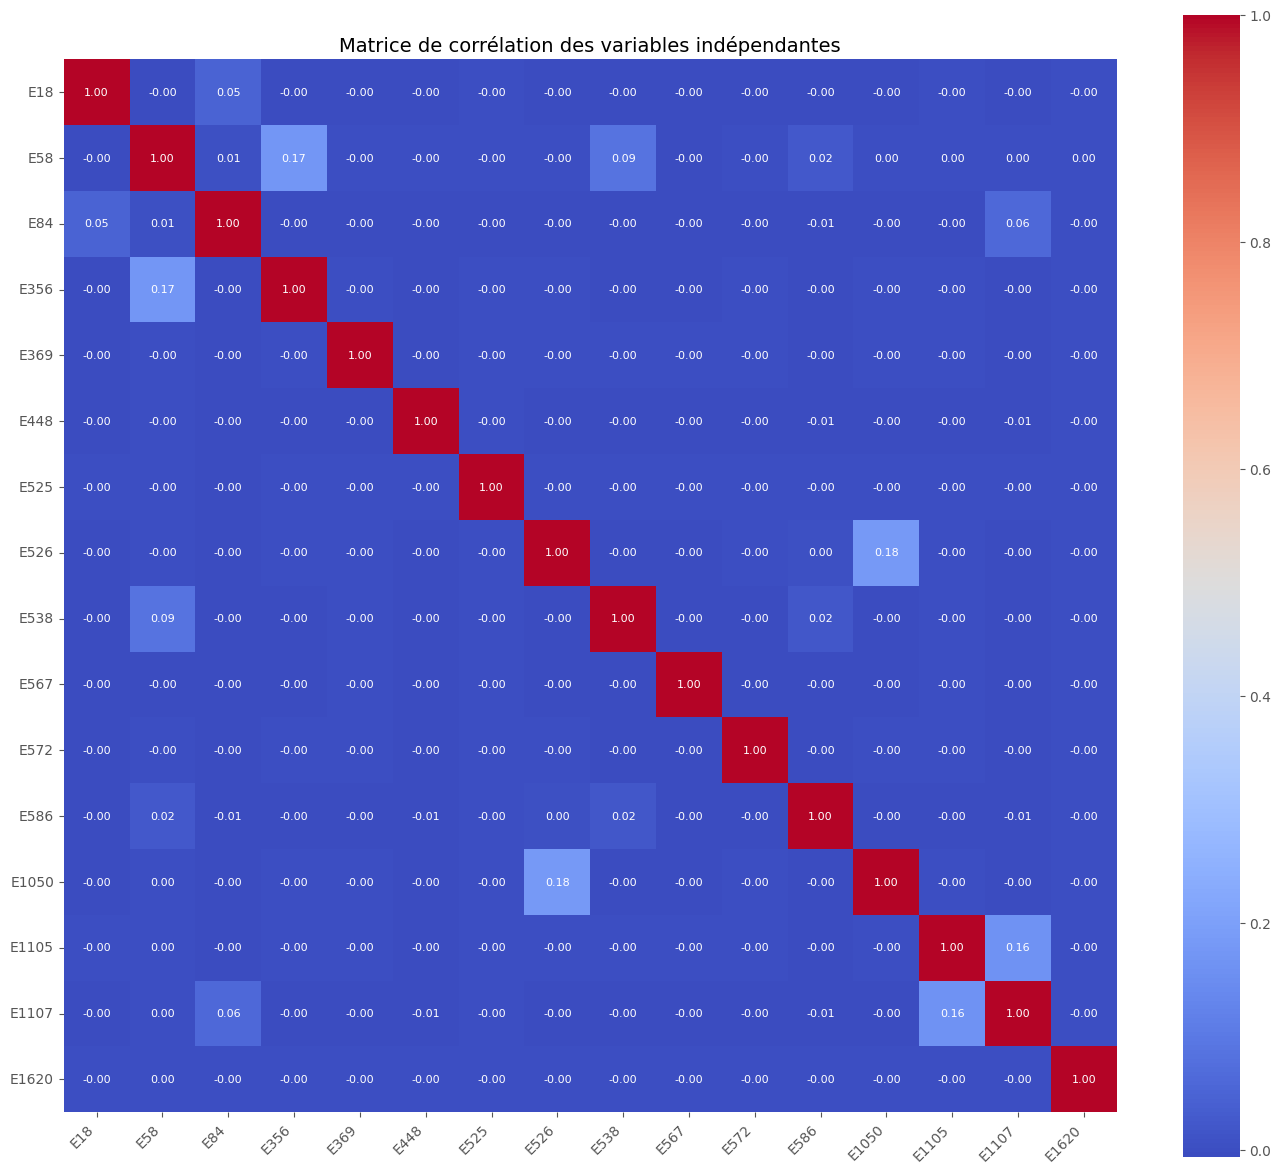

Variables supprimées en raison d'une forte corrélation: set()
Aperçu des DataFrames réduits :
             Timestamp  E18  E58  E84  E356  E369  E448  E525  E526  E538  \
0  2005-06-20 07:42:50    0    0    0     0     0     0     0     0     0   
1  2005-08-24 20:12:50    0    0    0     0     0     0     0     0     0   
2  2005-11-01 04:42:50    0    0    0     0     0     0     0     0     0   
3  2005-08-22 03:42:50    0    0    0     0     0     0     0     0     0   
4  2005-12-14 07:42:50    0    0    0     0     0     0     0     0     0   

   E567  E572  E586  E1050  E1105  E1107  E1620 Anomaly  
0     0     0     0      0      0      0      0    Fail  
1     0     0     0      0      0      0      0    Fail  
2     0     0     0      0      0      0      0    Fail  
3     0     0     0      0      0      0      0    Fail  
4     0     0     0      0      0      0      0    Fail  
             Timestamp  E18  E58  E84  E356  E369  E448  E525  E526  E538  \
0  2005-07-24 15:4

In [4]:
# Suppression des colonnes non indépendantes et calcul de la matrice de corrélation
correlation_matrix = train_df.drop(columns=['Timestamp', 'Anomaly']).corr()

# Affichage de la matrice de corrélation avec des ajustements pour éviter le chevauchement
plt.figure(figsize=(14, 12))  # Augmenter la taille du graphique
sns.heatmap(
    correlation_matrix, 
    annot=True, 
    fmt=".2f", 
    cmap='coolwarm', 
    square=True, 
    annot_kws={"size": 8}  # Taille des annotations
)

# Ajuster l'alignement des étiquettes des axes
plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotation des étiquettes sur l'axe x
plt.yticks(rotation=0, fontsize=10)  # Rotation des étiquettes sur l'axe y

plt.title('Matrice de corrélation des variables indépendantes', fontsize=14)
plt.tight_layout()  # Ajuste automatiquement les marges pour éviter les chevauchements
plt.show()

# Identification des variables fortement corrélées (corrélation > 0.7)
high_corr_var = set()
threshold = 0.7

# Parcourir les éléments de la matrice de corrélation
for i in range(len(correlation_matrix.columns)):
    for j in range(i):  # Éviter les doublons et la diagonale
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            colname = correlation_matrix.columns[i]
            high_corr_var.add(colname)

# Suppression des variables fortement corrélées
train_df_reduced = train_df.drop(columns=high_corr_var)
valid_df_reduced = valid_df.drop(columns=high_corr_var)
test_df_reduced = test_df.drop(columns=high_corr_var)

# Affichage des variables supprimées
print(f"Variables supprimées en raison d'une forte corrélation: {high_corr_var}")

# Vérification des DataFrames réduits
print("Aperçu des DataFrames réduits :")
print(train_df_reduced.head())
print(valid_df_reduced.head())
print(test_df_reduced.head())

# Création des échantillons avec bootstrap
Utiliser le bootstrap pour créer des échantillons de l'ensemble d'entraînement. Chaque échantillon a la même taille que l'ensemble d'entraînement d'origine (avec remplacement).

Pour chaque échantillon bootstrap, entraîner un modèle de régression logistique sur l'ensemble d'entraînement. Valider ce modèle sur un ensemble de validation distinct.

Répéter les étapes de création d'échantillons bootstrap et de modélisation un nombre défini de fois. Stocker les performances (Précision, Rappel et AUC).


Performances moyennes pour Logistic Regression:
Accuracy moyenne: 0.9880
Precision moyenne: 0.9892
Recall moyenne: 0.9987
F1 moyenne: 0.9940
Roc_auc moyenne: 0.2480

Performances moyennes pour Random Forest:
Accuracy moyenne: 0.9864
Precision moyenne: 0.9922
Recall moyenne: 0.9940
F1 moyenne: 0.9931
Roc_auc moyenne: 0.8272


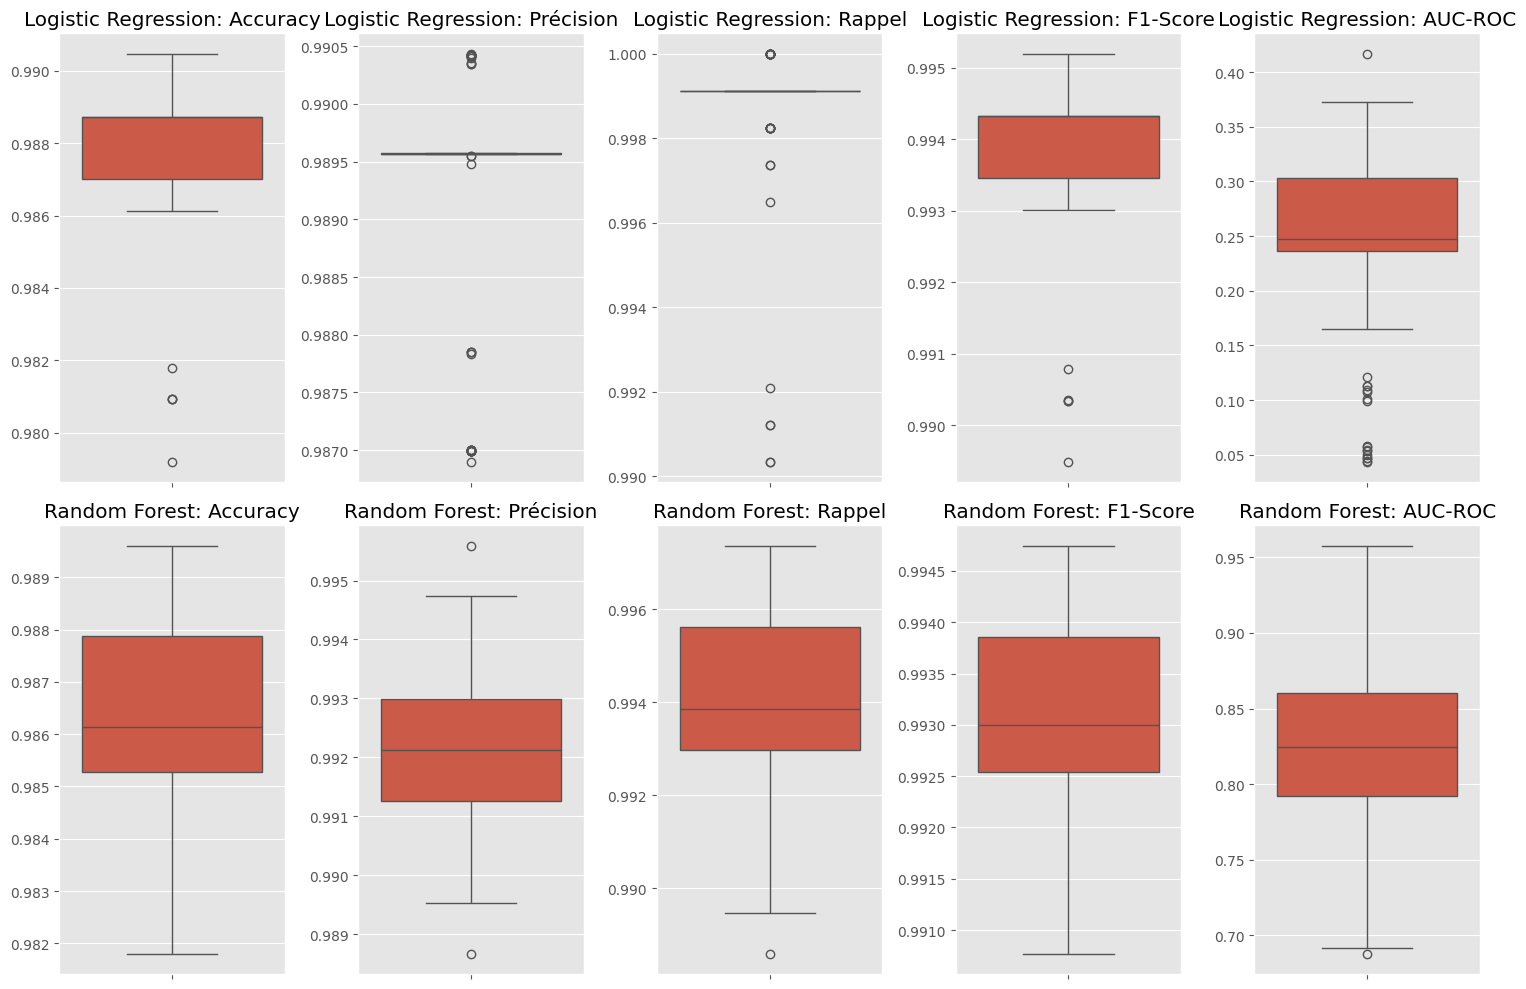

In [5]:
import numpy as np
import pandas as pd
from sklearn.utils import resample
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Définir le nombre d'échantillons bootstrap ou répétitions
n_iterations = 100

# Préparer les données
label_mapping = {'Fail': 1, 'Success': 0}
train_df_reduced['Anomaly'] = train_df_reduced['Anomaly'].map(label_mapping)
valid_df_reduced['Anomaly'] = valid_df_reduced['Anomaly'].map(label_mapping)

X_train = train_df_reduced.drop(columns=['Timestamp', 'Anomaly'])
y_train = train_df_reduced['Anomaly']
X_valid = valid_df_reduced.drop(columns=['Timestamp', 'Anomaly'])
y_valid = valid_df_reduced['Anomaly']

# Initialiser les listes pour stocker les performances des modèles
metrics_lr = {"accuracy": [], "precision": [], "recall": [], "f1": [], "roc_auc": []}
metrics_rf = {"accuracy": [], "precision": [], "recall": [], "f1": [], "roc_auc": []}

# Boucle principale pour le bootstrap et la modélisation
for _ in range(n_iterations):
    # Créer un échantillon bootstrap
    bootstrap_sample = resample(train_df_reduced, replace=True, n_samples=len(train_df_reduced), random_state=None)
    X_train_bootstrap = bootstrap_sample.drop(columns=['Timestamp', 'Anomaly'])
    y_train_bootstrap = bootstrap_sample['Anomaly']
    
    # Entraîner Logistic Regression
    model_lr = LogisticRegression(solver='saga', max_iter=50000, random_state=None)
    model_lr.fit(X_train_bootstrap, y_train_bootstrap)
    y_pred_lr = model_lr.predict(X_valid)
    y_pred_proba_lr = model_lr.predict_proba(X_valid)[:, 1]
    
    # Calculer les métriques pour Logistic Regression
    metrics_lr["accuracy"].append(accuracy_score(y_valid, y_pred_lr))
    metrics_lr["precision"].append(precision_score(y_valid, y_pred_lr))
    metrics_lr["recall"].append(recall_score(y_valid, y_pred_lr))
    metrics_lr["f1"].append(f1_score(y_valid, y_pred_lr))
    metrics_lr["roc_auc"].append(roc_auc_score(y_valid, y_pred_proba_lr))
    
    # Entraîner Random Forest
    model_rf = RandomForestClassifier(n_estimators=100, random_state=None)
    model_rf.fit(X_train_bootstrap, y_train_bootstrap)
    y_pred_rf = model_rf.predict(X_valid)
    y_pred_proba_rf = model_rf.predict_proba(X_valid)[:, 1]
    
    # Calculer les métriques pour Random Forest
    metrics_rf["accuracy"].append(accuracy_score(y_valid, y_pred_rf))
    metrics_rf["precision"].append(precision_score(y_valid, y_pred_rf))
    metrics_rf["recall"].append(recall_score(y_valid, y_pred_rf))
    metrics_rf["f1"].append(f1_score(y_valid, y_pred_rf))
    metrics_rf["roc_auc"].append(roc_auc_score(y_valid, y_pred_proba_rf))

# Afficher les performances moyennes pour Logistic Regression
print("\nPerformances moyennes pour Logistic Regression:")
for metric, values in metrics_lr.items():
    print(f"{metric.capitalize()} moyenne: {np.mean(values):.4f}")

# Afficher les performances moyennes pour Random Forest
print("\nPerformances moyennes pour Random Forest:")
for metric, values in metrics_rf.items():
    print(f"{metric.capitalize()} moyenne: {np.mean(values):.4f}")

# Visualisation des performances
plt.figure(figsize=(15, 10))

metrics_names = ["accuracy", "precision", "recall", "f1", "roc_auc"]
titles = ['Accuracy', 'Précision', 'Rappel', 'F1-Score', 'AUC-ROC']

for i, metric in enumerate(metrics_names):
    plt.subplot(2, 5, i + 1)
    sns.boxplot(data=metrics_lr[metric])
    plt.title(f'Logistic Regression: {titles[i]}')
    
    plt.subplot(2, 5, i + 6)
    sns.boxplot(data=metrics_rf[metric])
    plt.title(f'Random Forest: {titles[i]}')

plt.tight_layout()
plt.show()


# Évaluation finale sur le test
Appliquer le meilleur modèle sur l'ensemble de test. Calculer la matrice de confusion et des métriques comme l'accuracy, la précision, le rappel, le F1-Score, et l'AUC-ROC.


--- Modèle : Logistic Regression ---
Accuracy sur le test: 0.9939
Précision sur le test: 0.9948
Rappel sur le test: 0.9991
F1-Score sur le test: 0.9970
AUC-ROC sur le test: 0.9204


/home/ubuntu/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


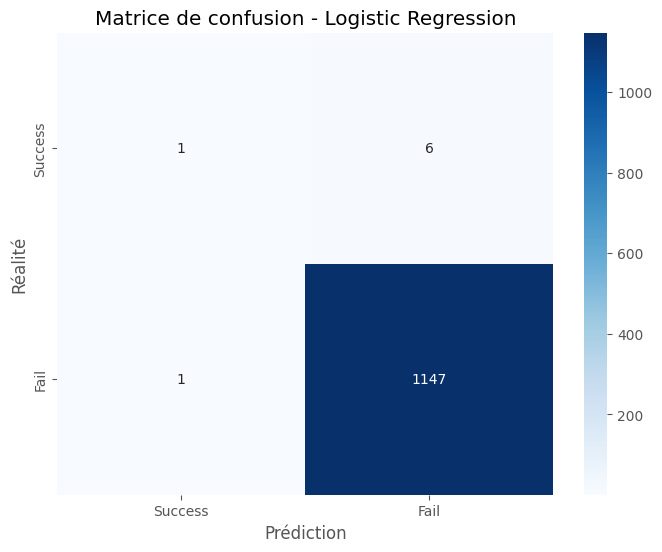

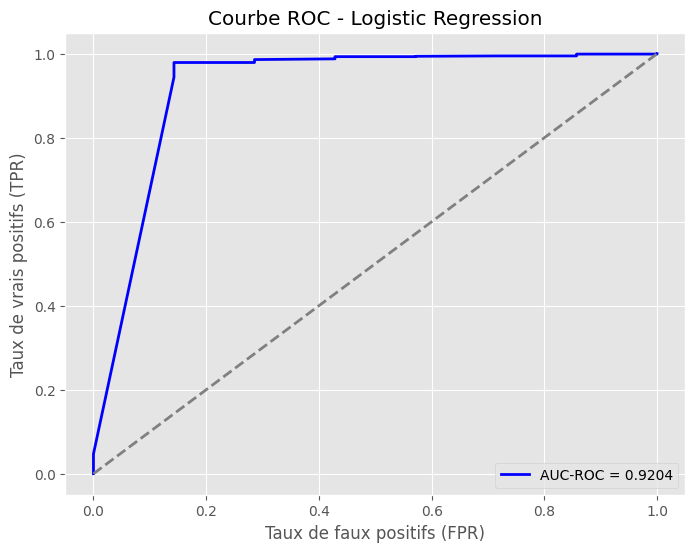


--- Modèle : Random Forest ---
Accuracy sur le test: 0.9913
Précision sur le test: 0.9956
Rappel sur le test: 0.9956
F1-Score sur le test: 0.9956
AUC-ROC sur le test: 0.8468


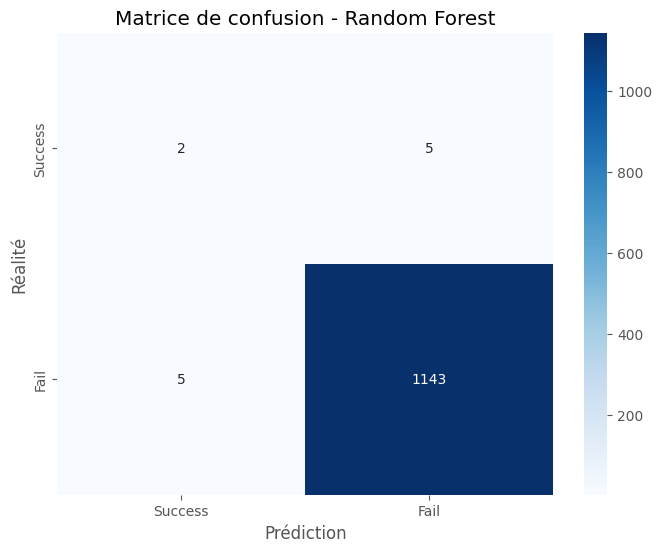

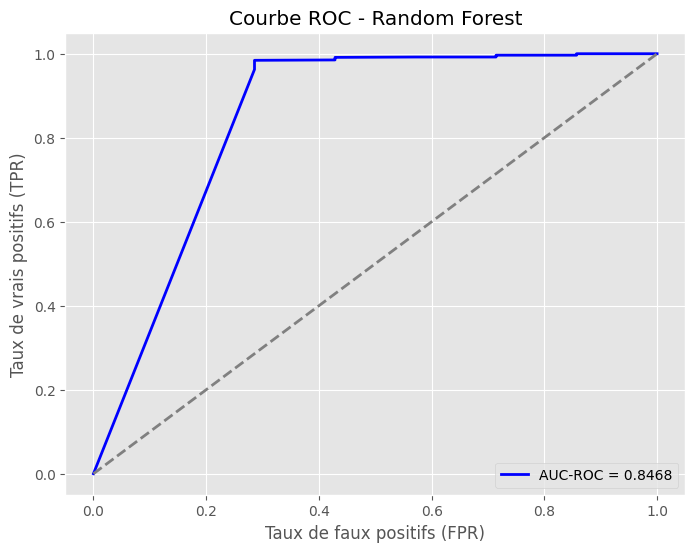


--- Comparaison des performances ---
                     Accuracy  Precision    Recall  F1-Score   AUC-ROC
Logistic Regression  0.993939   0.994796  0.999129  0.996958  0.920421
Random Forest        0.991342   0.995645  0.995645  0.995645  0.846814


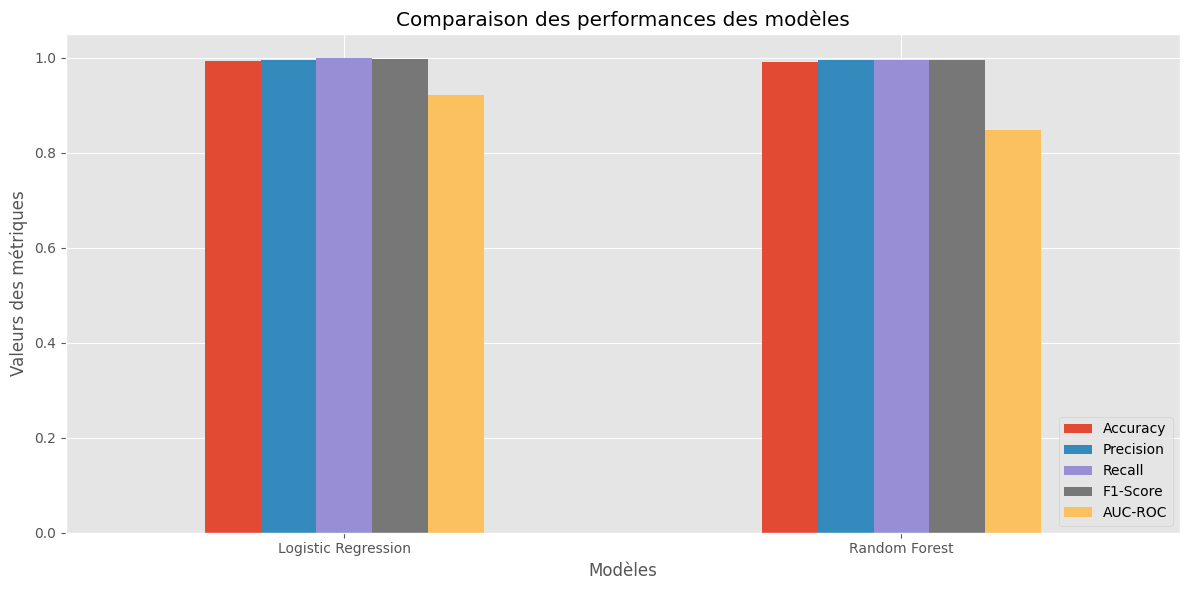

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Combine training and validation sets
X_train_full = pd.concat([X_train, X_valid])
y_train_full = pd.concat([y_train, y_valid])

# Prepare test set features and target
X_test = test_df_reduced.drop(columns=['Timestamp', 'Anomaly'])
y_test = test_df_reduced['Anomaly']

# Convert y_test to numerical values
label_mapping = {'Fail': 1, 'Success': 0}
y_test = y_test.map(label_mapping)

# Verify the conversion
if y_test.isnull().any():
    raise ValueError("y_test contains NaN values after mapping. Check the data.")

# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

# Store performance metrics
metrics = {}

# Train and evaluate each model
for model_name, model in models.items():
    print(f"\n--- Modèle : {model_name} ---")
    # Train the model
    model.fit(X_train_full, y_train_full)

    # Predict on the test set
    y_test_pred = model.predict(X_test)
    y_test_pred_proba = model.predict_proba(X_test)[:, 1]

    # Calculate performance metrics
    accuracy_test = accuracy_score(y_test, y_test_pred)
    precision_test = precision_score(y_test, y_test_pred)
    recall_test = recall_score(y_test, y_test_pred)
    f1_test = f1_score(y_test, y_test_pred)
    roc_auc_test = roc_auc_score(y_test, y_test_pred_proba)

    # Store metrics
    metrics[model_name] = {
        "Accuracy": accuracy_test,
        "Precision": precision_test,
        "Recall": recall_test,
        "F1-Score": f1_test,
        "AUC-ROC": roc_auc_test
    }

    # Display performance metrics
    print(f"Accuracy sur le test: {accuracy_test:.4f}")
    print(f"Précision sur le test: {precision_test:.4f}")
    print(f"Rappel sur le test: {recall_test:.4f}")
    print(f"F1-Score sur le test: {f1_test:.4f}")
    print(f"AUC-ROC sur le test: {roc_auc_test:.4f}")

    # Calculate and display the confusion matrix
    conf_matrix = confusion_matrix(y_test, y_test_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues', xticklabels=['Success', 'Fail'], yticklabels=['Success', 'Fail'])
    plt.xlabel('Prédiction')
    plt.ylabel('Réalité')
    plt.title(f'Matrice de confusion - {model_name}')
    plt.show()

    # Plot the ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_test_pred_proba)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'AUC-ROC = {roc_auc_test:.4f}')
    plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
    plt.xlabel('Taux de faux positifs (FPR)')
    plt.ylabel('Taux de vrais positifs (TPR)')
    plt.title(f'Courbe ROC - {model_name}')
    plt.legend(loc="lower right")
    plt.show()

# Compare the performance metrics of the two models
print("\n--- Comparaison des performances ---")
metrics_df = pd.DataFrame(metrics).T
print(metrics_df)

# Visualize the comparison as a bar chart
metrics_df.plot(kind='bar', figsize=(12, 6), rot=0)
plt.title("Comparaison des performances des modèles")
plt.ylabel("Valeurs des métriques")
plt.xlabel("Modèles")
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()


# Déterminer le meilleur modèle
Les performances des deux modèles sont affichées avec des valeurs pour chaque métrique.

Le modèle avec la meilleure performance globale est identifié et assigné à best_model.

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Logistic Regression
lr_model = LogisticRegression(max_iter=2000, random_state=42)
lr_model.fit(X_train_full, y_train_full)
y_test_pred_lr = lr_model.predict(X_test)
y_test_pred_proba_lr = lr_model.predict_proba(X_test)[:, 1]

# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_full, y_train_full)
y_test_pred_rf = rf_model.predict(X_test)
y_test_pred_proba_rf = rf_model.predict_proba(X_test)[:, 1]

# Calculer les métriques pour Logistic Regression
lr_metrics = {
    "Accuracy": accuracy_score(y_test, y_test_pred_lr),
    "Precision": precision_score(y_test, y_test_pred_lr),
    "Recall": recall_score(y_test, y_test_pred_lr),
    "F1-Score": f1_score(y_test, y_test_pred_lr),
    "AUC-ROC": roc_auc_score(y_test, y_test_pred_proba_lr)
}

# Calculer les métriques pour Random Forest
rf_metrics = {
    "Accuracy": accuracy_score(y_test, y_test_pred_rf),
    "Precision": precision_score(y_test, y_test_pred_rf),
    "Recall": recall_score(y_test, y_test_pred_rf),
    "F1-Score": f1_score(y_test, y_test_pred_rf),
    "AUC-ROC": roc_auc_score(y_test, y_test_pred_proba_rf)
}

# Comparer les métriques
print("\nPerformances de Logistic Regression:")
for metric, value in lr_metrics.items():
    print(f"{metric}: {value:.4f}")

print("\nPerformances de Random Forest:")
for metric, value in rf_metrics.items():
    print(f"{metric}: {value:.4f}")

# Décider du modèle avec la meilleure performance globale (exemple basé sur AUC-ROC)
if lr_metrics["AUC-ROC"] > rf_metrics["AUC-ROC"]:
    print("\nLogistic Regression a performé le mieux selon AUC-ROC.")
    best_model = lr_model  # Assigner Logistic Regression comme meilleur modèle
else:
    print("\nRandom Forest a performé le mieux selon AUC-ROC.")
    best_model = rf_model  # Assigner Random Forest comme meilleur modèle



Performances de Logistic Regression:
Accuracy: 0.9939
Precision: 0.9948
Recall: 0.9991
F1-Score: 0.9970
AUC-ROC: 0.9223

Performances de Random Forest:
Accuracy: 0.9913
Precision: 0.9956
Recall: 0.9956
F1-Score: 0.9956
AUC-ROC: 0.8468

Logistic Regression a performé le mieux selon AUC-ROC.


# Interprétation du modèle AiOps


Comparaison des importances des variables :
   Variable  Importance_LogisticRegression  Importance_RandomForest
0      E572                       1.833910                 0.029477
1       E58                       1.173047                 0.025665
2      E369                       0.877066                 0.013598
3     E1050                       0.750629                 0.016800
4     E1620                       0.478877                 0.025254
5      E538                       0.380342                 0.051743
6      E356                       0.179875                 0.015466
7     E1105                       0.121167                 0.016610
8       E84                       0.108337                 0.001888
9      E525                       0.015575                 0.035344
10     E526                       0.007927                 0.133948
11     E586                       0.003603                 0.272307
12     E567                       0.002997                 0.069902
13 

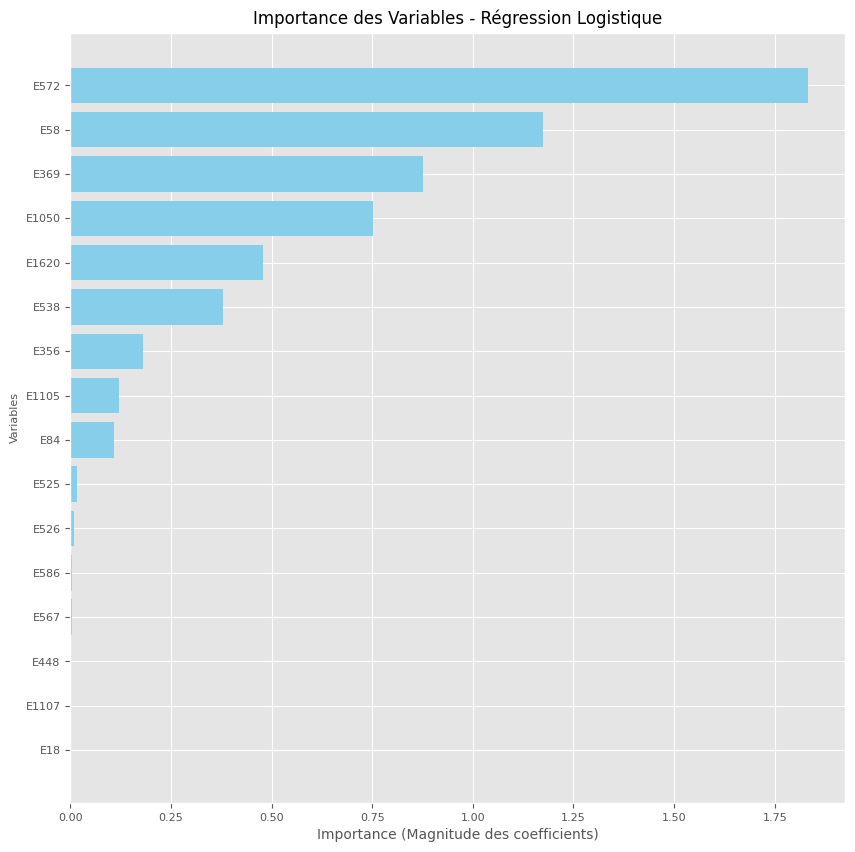

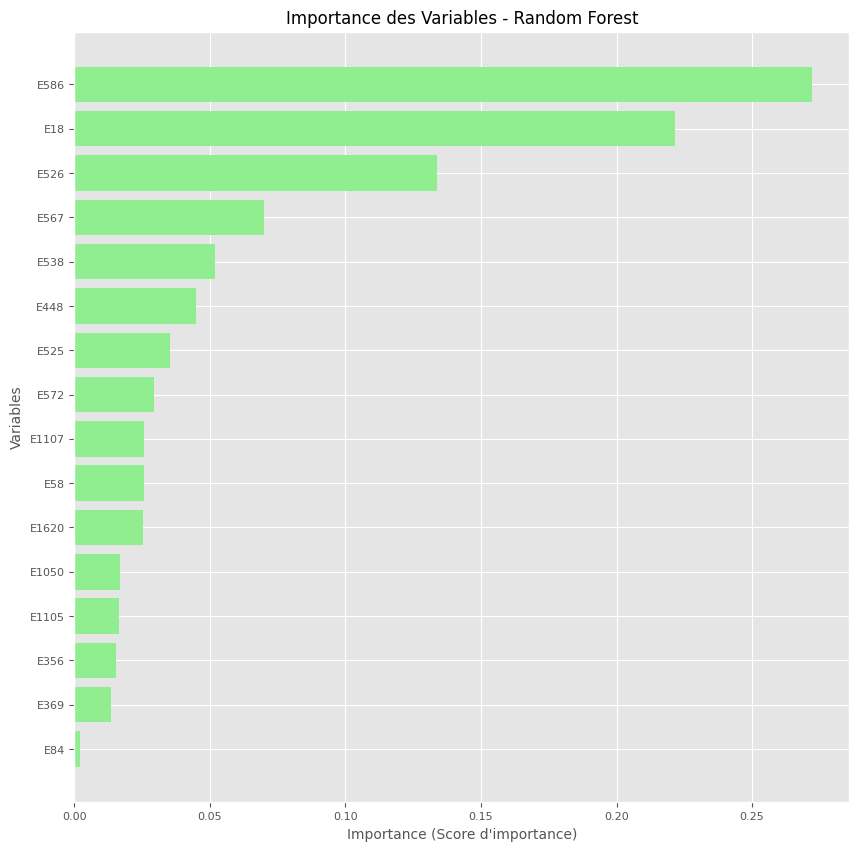

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Entraîner un modèle Logistic Regression
log_model = LogisticRegression(max_iter=2000, random_state=42)
log_model.fit(X_train_full, y_train_full)

# Extraire les coefficients pour Logistic Regression
coefficients = log_model.coef_[0]  # Coefficients du modèle Logistic Regression
feature_names = X_train_full.columns  # Noms des variables dans l'ensemble combiné

# Calculer l'importance des variables pour Logistic Regression
logistic_importances = pd.DataFrame({
    'Variable': feature_names,
    'Importance': np.abs(coefficients)  # Valeurs absolues des coefficients
}).sort_values(by='Importance', ascending=False)

# Entraîner un modèle Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_full, y_train_full)

# Calculer l'importance des variables pour Random Forest
rf_importances = pd.DataFrame({
    'Variable': feature_names,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Comparaison des importances
comparison = logistic_importances.merge(
    rf_importances, on='Variable', suffixes=('_LogisticRegression', '_RandomForest')
)

# Afficher la comparaison
print("\nComparaison des importances des variables :")
print(comparison)

# Exporter la comparaison dans un fichier CSV
comparison.to_csv('BGL_results/BGL_comparison_importances.csv', index=False)

# Visualisation des importances pour Logistic Regression
plt.figure(figsize=(10, 10))
plt.barh(logistic_importances['Variable'], logistic_importances['Importance'], color='skyblue')
plt.xlabel('Importance (Magnitude des coefficients)', fontsize=10)
plt.ylabel('Variables', fontsize=8)
plt.title('Importance des Variables - Régression Logistique', fontsize=12)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.gca().invert_yaxis()
plt.show()

# Visualisation des importances pour Random Forest
plt.figure(figsize=(10, 10))
plt.barh(rf_importances['Variable'], rf_importances['Importance'], color='lightgreen')
plt.xlabel('Importance (Score d\'importance)', fontsize=10)
plt.ylabel('Variables', fontsize=10)
plt.title('Importance des Variables - Random Forest', fontsize=12)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.gca().invert_yaxis()
plt.show()


In [12]:
# Exporter la liste des variables importantes dans un fichier CSV
logistic_importances.to_csv('BGL_results/BGL_LR_importances.csv', index=False)
rf_importances.to_csv('BGL_results/BGL_RF_importances.csv', index=False)